[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from c

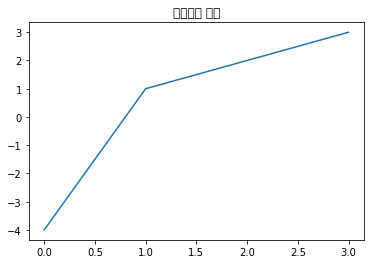

In [2]:
plt.title("한글폰트 설정")
plt.plot([-4,1,2,3])

In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [4]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

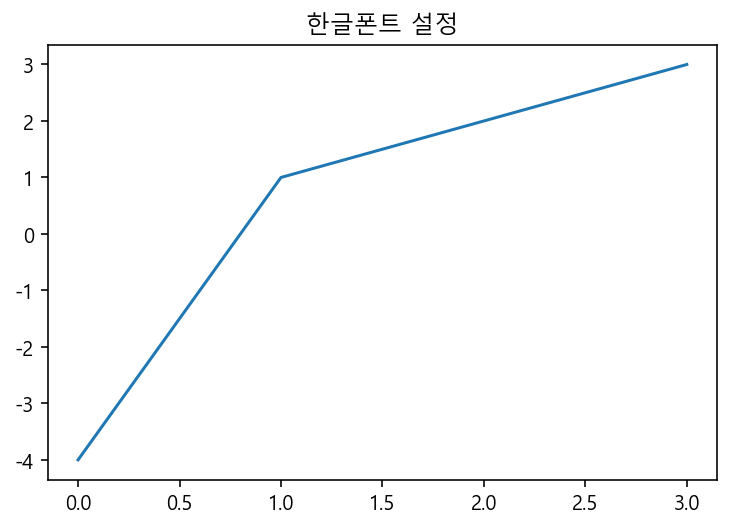

In [5]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4,1,2,3])

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [6]:
df=pd.read_csv("상가업소정보_201912_01.csv",sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


### 데이터 크기 보기

In [7]:
df.shape

(573680, 39)

### info 보기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

<AxesSubplot:>

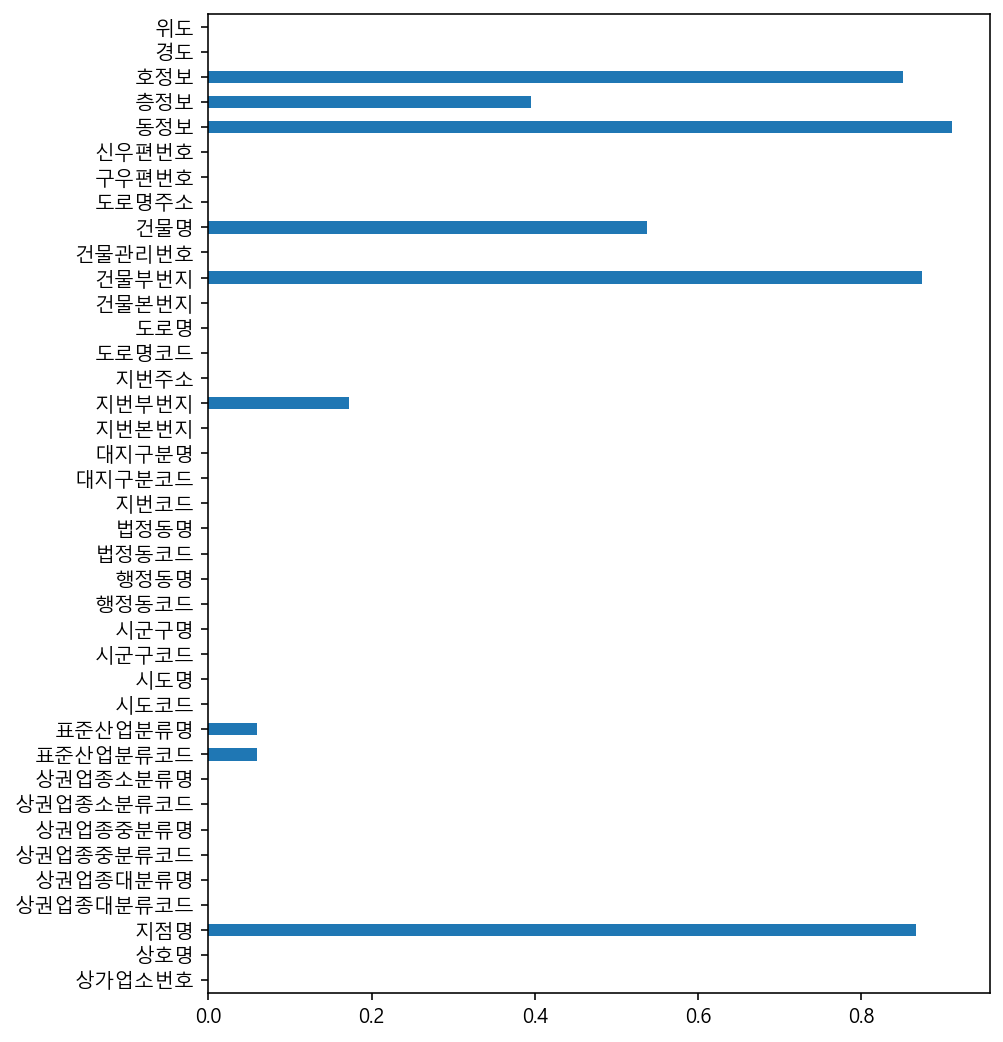

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

### 사용하지 않는 컬럼 제거하기

In [10]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
columns

['상호명',
 '상권업종대분류명',
 '상권업종중분류명',
 '상권업종소분류명',
 '시도명',
 '시군구명',
 '행정동명',
 '법정동명',
 '도로명주소',
 '경도',
 '위도']

In [11]:
# 제거 후 메모리 사용량 보기
df=df[columns].copy()
df.shape

(573680, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [13]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249


In [14]:
df_seoul=df[df["시도명"]=="서울특별시"].copy()
df_seoul

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


In [15]:
df_seoul.shape

(407376, 11)

In [16]:
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [17]:
df_seoul["시군구명"].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [18]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv",index=False)

In [19]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.
pd.read_csv("seoul_open_store.csv")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...
407371,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
407372,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
407373,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202
407374,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172


## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [20]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul["상호명_소문자"]=df_seoul["상호명"].str.lower()
df_seoul

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922,와라와라호프
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675,커피빈코리아선릉로93길점
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711,프로포즈
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249,가락사우나내스낵
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149,초밥왕
...,...,...,...,...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,한식/백반/한정식,서울특별시,마포구,공덕동,공덕동,서울특별시 마포구 마포대로14길 4,126.955059,37.548618,비파티세리공덕
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 성수일로8길 37,127.054615,37.545853,앤탑pc방
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,서울특별시,강남구,논현1동,논현동,서울특별시 강남구 강남대로 492,127.024102,37.506202,오즈아레나pc방
573678,파인트리네일,생활서비스,이/미용/건강,발/네일케어,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172,파인트리네일


In [21]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins")].shape

(466, 12)

In [22]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"상호명_소문자"]

76             배스킨라빈스
2164           베스킨라빈스
11060     베스킨라빈스은행나무점
13953          배스킨라빈스
14201          베스킨라빈스
             ...     
557464       배스킨라빈스31
557822       배스킨라빈스31
558006       배스킨라빈스31
561929       배스킨라빈스31
561930       배스킨라빈스31
Name: 상호명_소문자, Length: 466, dtype: object

In [23]:
df_seoul["상호명_소문자"].str.extract("(베|배)스킨라빈스|baskinrobbins")[0].value_counts()

배    347
베    117
Name: 0, dtype: int64

In [24]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul[df_seoul["상호명_소문자"].str.contains("던킨|dunkin")].shape

(191, 12)

In [25]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"),"상호명_소문자"]

1167              던킨도너츠
1819        던킨도너츠테크노마트점
2305         던킨도너츠창동하나로
2342      던킨도너츠용산민자역사2호
3007              던킨도너츠
              ...      
553907            던킨도너츠
554211            던킨도너츠
558894    dunkindoonuts
560984            던킨도너츠
569825            던킨도너츠
Name: 상호명_소문자, Length: 191, dtype: object

In [26]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.
df_31=df_seoul[df_seoul["상호명_소문자"].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로
...,...,...,...,...,...,...,...,...,...,...,...,...
558894,DUNKINDOONUTS,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초2동,서초동,서울특별시 서초구 강남대로 373,127.027989,37.495971,dunkindoonuts
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스31
561930,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강동구,강일동,강일동,서울특별시 강동구 아리수로 427,127.174586,37.564954,배스킨라빈스31


In [27]:
df_31.shape

(657, 12)

In [28]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"브랜드명"]="베스킨라빈스"
df_31

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스,베스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스,베스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558894,DUNKINDOONUTS,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초2동,서초동,서울특별시 서초구 강남대로 373,127.027989,37.495971,dunkindoonuts,NaN
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠,NaN
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스31,베스킨라빈스
561930,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강동구,강일동,강일동,서울특별시 강동구 아리수로 427,127.174586,37.564954,배스킨라빈스31,베스킨라빈스


In [29]:
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"브랜드명"]="던킨도너츠"
# df_31

df_31=df_31.fillna("던킨도너츠")
df_31

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스,베스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스,베스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로,던킨도너츠
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558894,DUNKINDOONUTS,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초2동,서초동,서울특별시 서초구 강남대로 373,127.027989,37.495971,dunkindoonuts,던킨도너츠
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠,던킨도너츠
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스31,베스킨라빈스
561930,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강동구,강일동,강일동,서울특별시 강동구 아리수로 427,127.174586,37.564954,배스킨라빈스31,베스킨라빈스


In [30]:
df_31["상권업종대분류명"].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [31]:
# df_31[(df_31["상권업종대분류명"]=="소매")|(df_31["상권업종대분류명"]=="생활서비스")]
df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,베스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,베스킨라빈스


In [32]:
df_31=df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]
df_31

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스,베스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점,던킨도너츠
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스,베스킨라빈스
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로,던킨도너츠
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558894,DUNKINDOONUTS,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초2동,서초동,서울특별시 서초구 강남대로 373,127.027989,37.495971,dunkindoonuts,던킨도너츠
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠,던킨도너츠
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스31,베스킨라빈스
561930,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강동구,강일동,강일동,서울특별시 강동구 아리수로 427,127.174586,37.564954,배스킨라빈스31,베스킨라빈스


### 범주형 값으로 countplot 그리기

In [33]:
brand_count=df_31["브랜드명"].value_counts()
brand_count

베스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

In [34]:
df_31["브랜드명"].value_counts(normalize=True)

베스킨라빈스    0.708397
던킨도너츠     0.291603
Name: 브랜드명, dtype: float64

<AxesSubplot:>

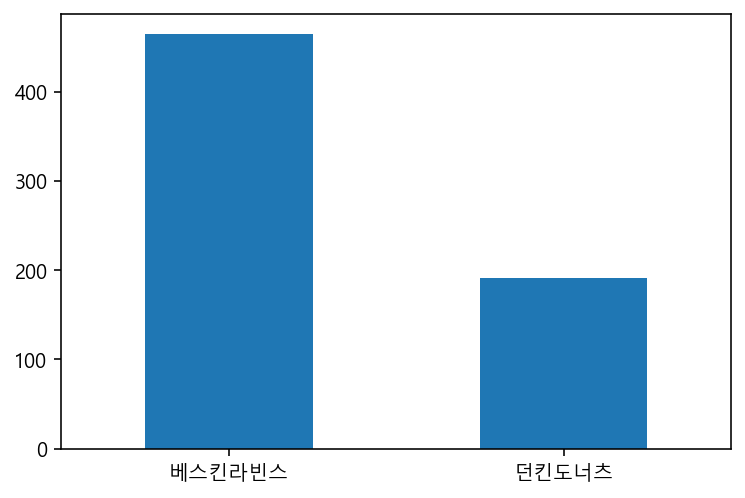

In [35]:
df_31["브랜드명"].value_counts().plot.bar(rot=0)


Text(1, 191, '191')

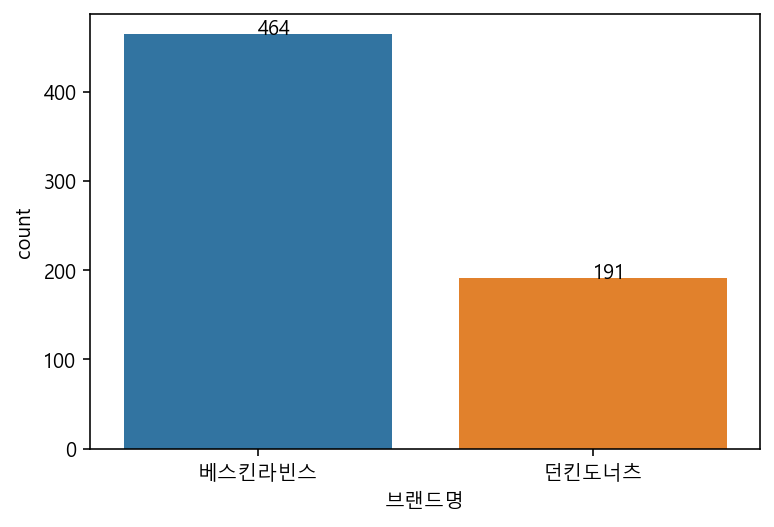

In [36]:
g=sns.countplot(x=df_31["브랜드명"])
g.text(x=0,y=brand_count[0],s=brand_count[0])
g.text(x=1,y=brand_count[1],s=brand_count[1])

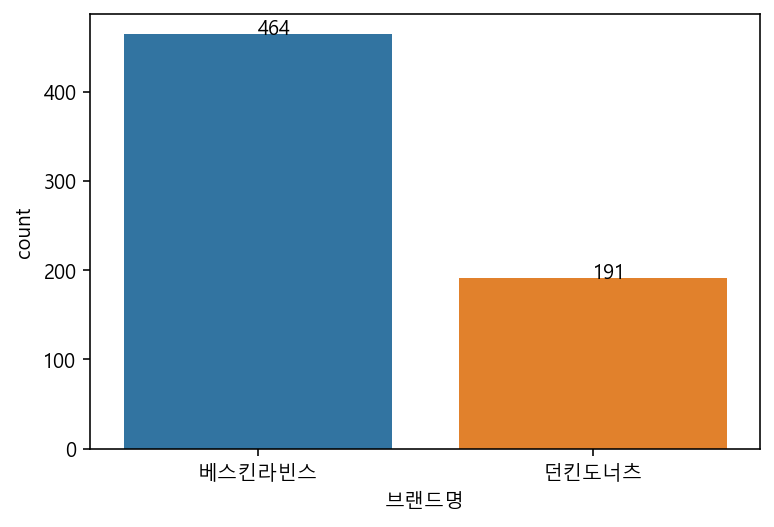

In [37]:
g=sns.countplot(x=df_31["브랜드명"])
for i, value in enumerate(brand_count.index):
    g.text(x=i,y=brand_count[i],s=brand_count[i])

<AxesSubplot:xlabel='시군구명', ylabel='count'>

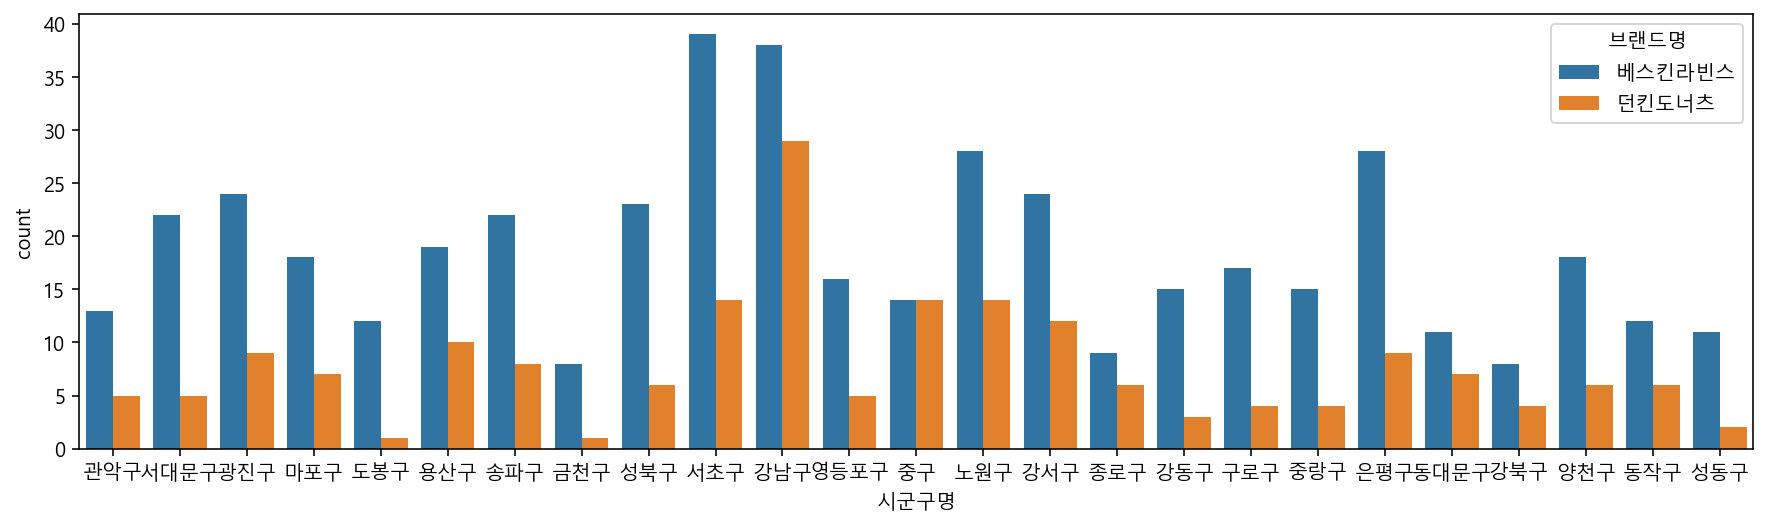

In [38]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_31,x="시군구명",hue="브랜드명")

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

<AxesSubplot:xlabel='경도', ylabel='위도'>

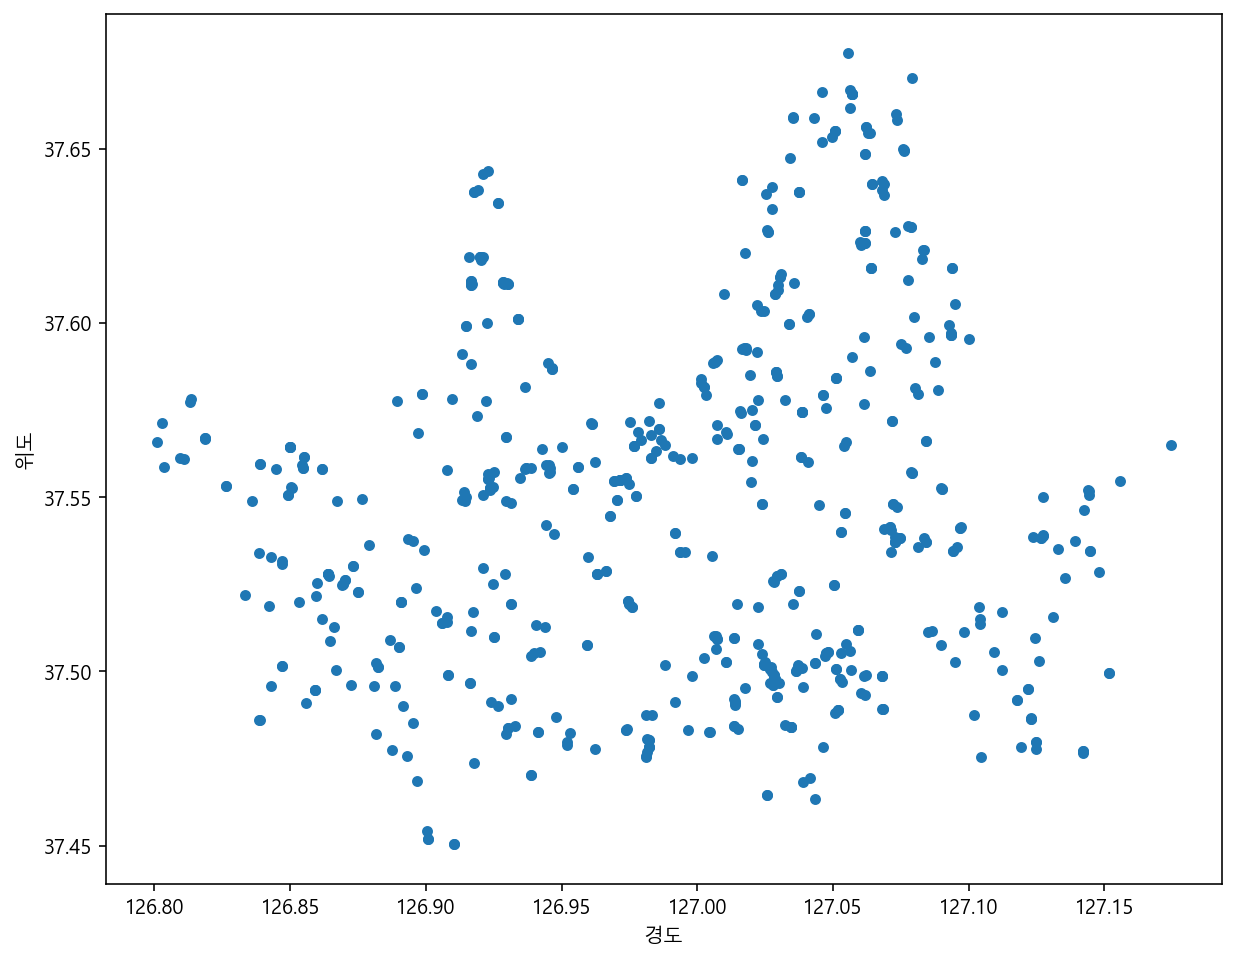

In [39]:
df_31[["위도","경도"]].plot.scatter(x="경도",y="위도",figsize=(10,8))

<AxesSubplot:xlabel='경도', ylabel='위도'>

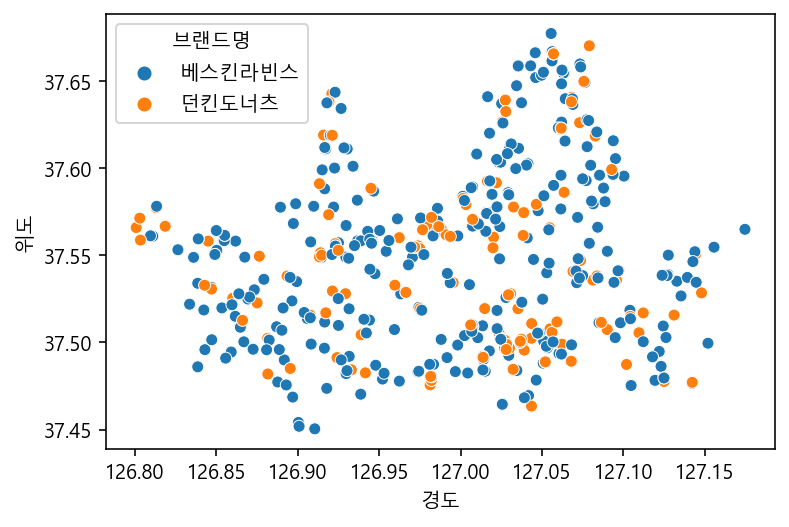

In [40]:
sns.scatterplot(data=df_31,x="경도",y="위도",hue="브랜드명")

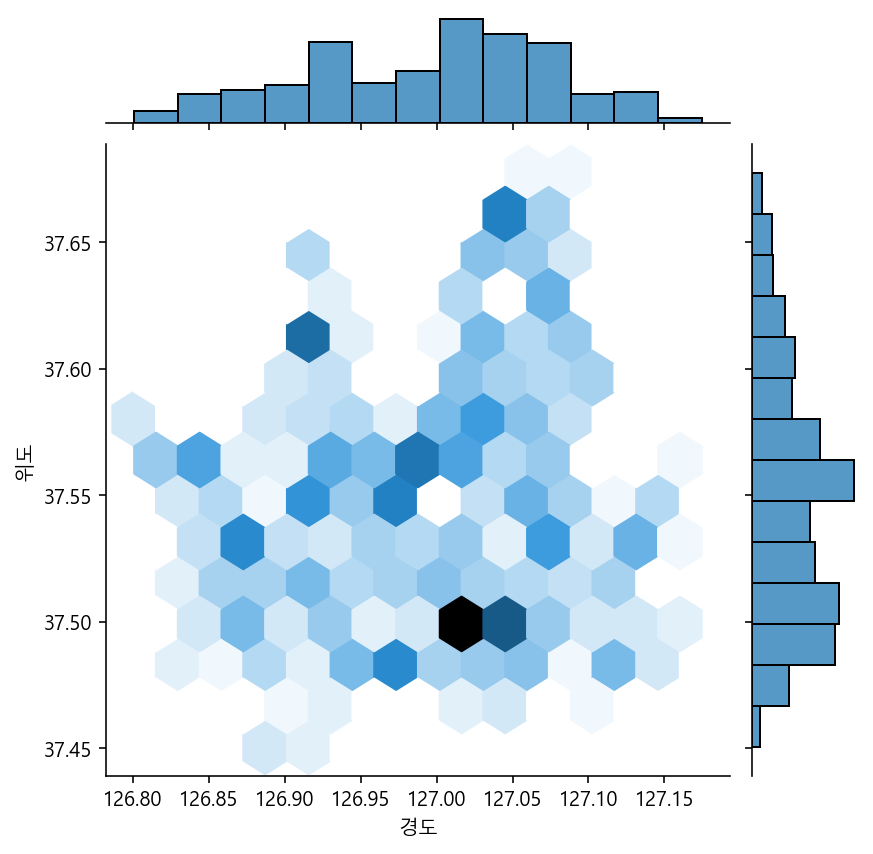

In [41]:
sns.jointplot(data=df_31,x="경도",y="위도",kind="hex")